In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#Connect to the Google Drive

Mounted at /content/drive


Connect to the google Drive

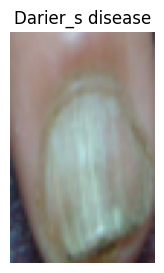

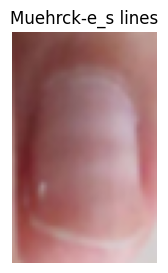

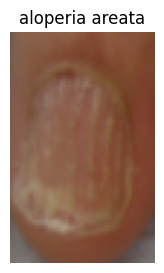

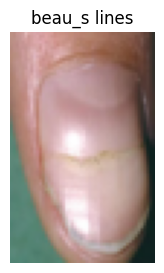

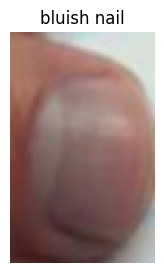

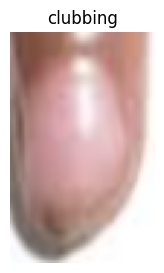

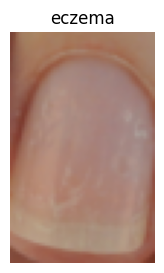

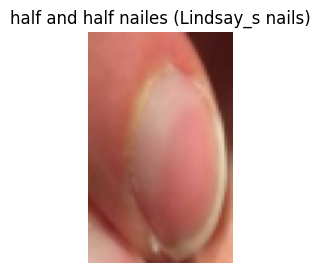

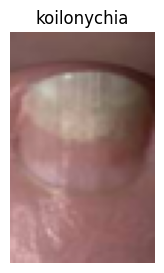

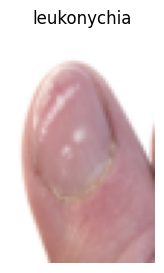

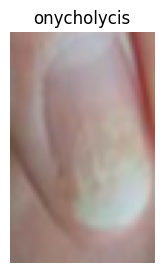

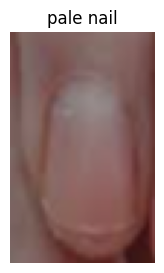

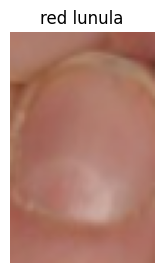

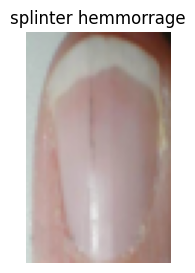

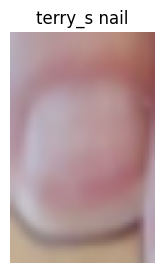

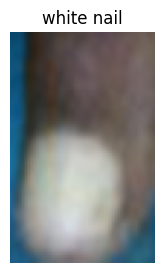

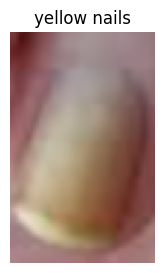

In [ ]:
import torch
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt

# Set the path to your dataset
src_path = "/content/drive/MyDrive/4th Year Research Project Practical/Weekly Practical/Nail Disease datasets/train"

# Define transformations for the images
transform = transforms.Compose([
    transforms.Resize((80, 50)),  # Adjust desired_height and desired_width
    transforms.ToTensor(),
])

# Load the dataset
dataset = ImageFolder(root=src_path, transform=transform)

# Map class names to indices
class_to_idx = {class_name: idx for idx, class_name in enumerate(dataset.classes)}

# Create a dataloader for each class
class_dataloaders = []
for class_name in dataset.classes:
    class_indices = [i for i, label in enumerate(dataset.targets) if dataset.classes[label] == class_name]
    class_dataset = torch.utils.data.Subset(dataset, class_indices)
    class_dataloader = DataLoader(class_dataset, batch_size=1, shuffle=True)
    class_dataloaders.append((class_name, class_dataloader))

# Display one image from each class separately
for class_name, class_dataloader in class_dataloaders:
    fig, axes = plt.subplots(1, 1, figsize=(3, 3))

    # Display one image from the current class
    images, labels = next(iter(class_dataloader))
    image_np = images.numpy().squeeze().transpose((1, 2, 0))

    axes.imshow(image_np)
    axes.set_title(class_name)
    axes.axis('off')

    plt.show()


In [ ]:
print(len(dataset))

571


In [ ]:
import torch
import torch.nn as nn
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision import transforms

class CNNModel(nn.Module):
    def __init__(self, num_classes=7):
        super(CNNModel, self).__init__()

        # Convolutional layers
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Adaptive pooling layer
        self.adaptive_pool = nn.AdaptiveAvgPool2d((1, 1))

        # Fully connected layers
        self.fc1 = nn.Linear(64, 512)
        self.relu3 = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))

        # Adaptive pooling to handle variable input sizes
        x = self.adaptive_pool(x)

        # Flatten the tensor before the fully connected layer
        x = x.view(x.size(0), -1)

        # Fully connected layers with dropout
        x = self.relu3(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Define the transformations to resize the images
transform = transforms.Compose([
    transforms.Resize((64, 50)),  # Adjust the target size based on your requirements
    transforms.ToTensor(),
])

# Assuming you have a dataset class named YourDatasetClass
# You need to replace YourDatasetClass with the actual class you are using
# and update the root_dir and transform based on your requirements.
src_path = "/content/drive/MyDrive/4th Year Research Project Practical/Weekly Practical/Nail Disease datasets/train"

dataset = ImageFolder(root=src_path, transform=transform)

# Initialize the model
model = CNNModel(num_classes=7)

# Define your loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

# Assuming you have a DataLoader named active_learning_dataloader
# You need to replace it with the DataLoader for your dataset
active_learning_dataloader = DataLoader(dataset, batch_size=10, shuffle=True)

# Define the number of epochs
epochs = 100 # Adjust as needed

for epoch in range(epochs):
    model.train()
    for inputs, labels in active_learning_dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

In [ ]:
src_path = "/content/drive/MyDrive/4th Year Research Project Practical/Weekly Practical/Nail Disease datasets/test"

test_dataset = ImageFolder(root=src_path, transform=transform)
test_dataloader = DataLoader(test_dataset, batch_size=4, shuffle=False)

correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_dataloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {accuracy}')

Test Accuracy: 0.096045197740113
